In [35]:
import pickle
from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import spacy as spc
from sklearn.cluster import SpectralClustering
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import spectral_embedding
from sklearn.metrics.pairwise import cosine_similarity
from umap import UMAP

nlp = spc.load("en_core_web_sm")

seed = 42
np.random.seed(seed)
random_state = np.random.RandomState(seed)

In [2]:
dataset = fetch_20newsgroups(subset="all", random_state=random_state, remove=("headers", "footers", "quoter"))
corpus = dataset.data
y = dataset.target
y_names = dataset.target_names
print(len(np.unique(y_names)))

20


In [3]:
path_to_preprocessed_corpus = "preprocessed_corpus.pkl"
if Path(path_to_preprocessed_corpus).is_file():
    with open(path_to_preprocessed_corpus, "rb") as f:
        preprocessed_corpus = pickle.load(f)
else:
    preprocessed_corpus = []
    for i, text in enumerate(corpus):
        doc = nlp(text.lower())
        preprocessed_corpus.append([
            token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.like_email and
                                             not token.is_bracket and not token.is_quote and not token.is_currency and 
                                             not token.like_num and not token.is_space and not token.like_url
        ])
    with open(path_to_preprocessed_corpus, "wb") as f:
        pickle.dump(preprocessed_corpus, f)


In [4]:
vectorizer = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x, min_df=2)
tfidf_doc_term_matrix = vectorizer.fit_transform(preprocessed_corpus)
print(vectorizer.get_feature_names())
print(tfidf_doc_term_matrix.shape)

['"-dg', '"-genesis-', '"-sagredo', '"[1', '"[2', '"gette', '"titanium', '$140', '$5000', "'6", "'[1", "'[155", "'[162", '(=', '(btw', '(from', '(please', '(suprised', '(which', '+', '+12v', '+3d', '+41(22', '+4wa', '+5v', '-${rm', "-''my", '-(experimental', '-+', '-+-', '--"if', '--+', '---+', '-----(end', '-----+', '------+', '-------+', '--------+', '---------+', '---------------+', '----------------+', '------------------+--------------------------------------------------------', '----------------------------+', '-----------------------------------+------------------------+', '------------------------------------------------+', '-------------------------------------------------------+', '----------------------------------------------------------+', '-----------------------------------------------------------+', '------------------------------------------------------------------+', '-------------------------------------------------------------------+', '-----------------------------

In [5]:
# path_to_similarity_matrix = "similarity_matrix.pkl"
# if Path(path_to_similarity_matrix).is_file():
#     with open(path_to_preprocessed_corpus, "rb") as f:
#         similarity_matrix = pickle.load(f)
# else:
#     similarity_matrix = cosine_similarity(tfidf_doc_term_matrix)
#     with open(path_to_similarity_matrix, "wb") as f:
#         pickle.dump(similarity_matrix, f)
# print(similarity_matrix)

similarity_matrix = cosine_similarity(tfidf_doc_term_matrix)

In [6]:
embedding = spectral_embedding(similarity_matrix, n_components=50, drop_first=False, random_state=random_state)
# embedding = UMAP(n_components=2, n_neighbors=30, min_dist=0.0, random_state=random_state).fit_transform(embedding)

# clusters = SpectralClustering(
#     n_clusters=20, affinity="precomputed", random_state=random_state, n_jobs=-1
# ).fit_predict(similarity_matrix)
# 
# counter = Counter(clusters)
# print(f"cluster sizes: {sorted(counter.items(), key=lambda x: x[1], reverse=True)}")

c:\users\thalvari\pycharmprojects\nlp20_project\venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [8]:
# G = nx.from_numpy_array(similarity_matrix)
# print(sorted(nx.connected_components(G), key=len))

In [53]:
df = pd.DataFrame(embedding)
print(df.shape)
first_ev = df[0].values.round(10)
print(first_ev)
counter = Counter(first_ev)
largest_cc_calue = counter.most_common(1)[0][0]
print(largest_cc_calue)
df_largest_cc = df[first_ev == largest_cc_calue]
print(df_largest_cc.values)

(18846, 50)
[0.0001256 0.0001256 0.0001256 ... 0.0001256 0.0001256 0.0001256]
0.0001255968
[[ 1.25596804e-04 -4.36971445e-04 -1.36543067e-06 ... -1.03332189e-04
  -5.44513091e-04 -1.90185040e-04]
 [ 1.25596804e-04 -4.36971445e-04 -6.67257285e-07 ...  7.18367047e-04
   2.27531074e-04 -4.19430180e-04]
 [ 1.25596804e-04 -4.36971445e-04 -1.27783285e-06 ...  1.39652632e-04
  -3.24936497e-04 -2.44110441e-04]
 ...
 [ 1.25596804e-04 -4.36971445e-04 -1.38846294e-06 ... -9.32721421e-04
  -9.20168787e-04  4.48431030e-04]
 [ 1.25596804e-04 -4.36971445e-04 -1.05671722e-06 ... -2.47247020e-04
   4.27714777e-05  2.13101813e-04]
 [ 1.25596804e-04 -4.36971445e-04 -1.88429473e-06 ...  1.24491472e-04
   1.53974980e-04 -1.49178488e-04]]


In [54]:
embedding_2 = UMAP(
    n_components=2, n_neighbors=30, min_dist=0.0, random_state=random_state
).fit_transform(df_largest_cc.values)

c:\users\thalvari\pycharmprojects\nlp20_project\venv\lib\site-packages\numba\typed_passes.py:292: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "venv\lib\site-packages\umap\rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  warnings.warn(errors.NumbaPerformanceWarning(msg,
c:\users\thalvari\pycharmprojects\nlp20_project\venv\lib\site-packages\numba\typed_passes.py:292: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "venv\lib\si

(18798, 1)


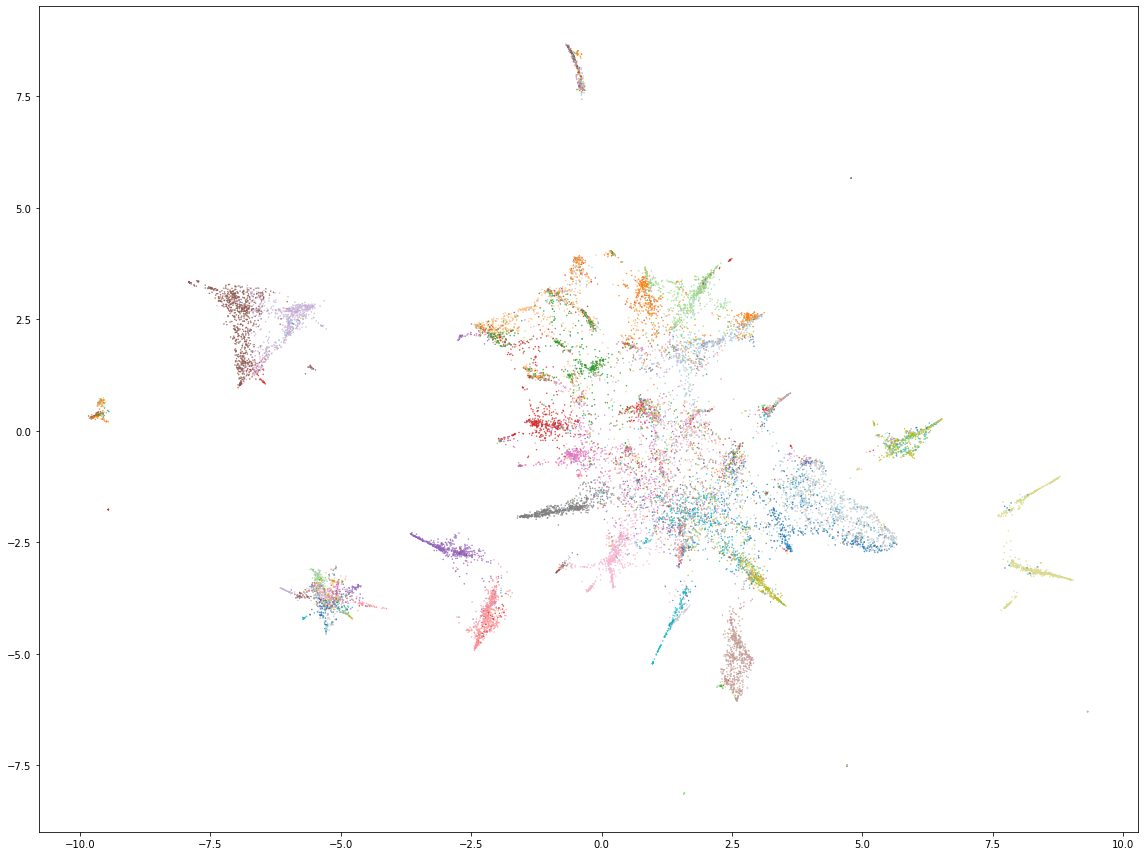

In [59]:
y_df = pd.DataFrame(y)
y_df = y_df[first_ev == largest_cc_calue]
print(y_df.shape)
plt.figure(figsize=(16, 12))
plt.scatter(embedding_2[:, 0], embedding_2[:, 1], c=y_df.values, s=.2, cmap="tab20")
plt.tight_layout()
plt.show()